<a href="https://colab.research.google.com/github/nguyendoanquangnhat/Fuzzy-Logic/blob/main/FuzzyLogic_EX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=af6ac3544fd7aadffb3ed66cfaf61b86cbffd45070d088c02639ef8ad60e69bc
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


31.749999999999993


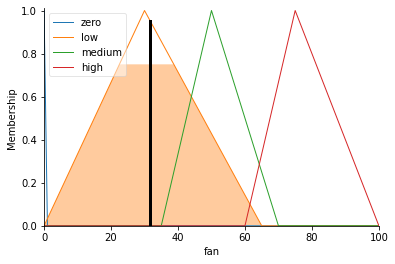

In [6]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl 

temp = ctrl.Antecedent(np.arange(10,41,1),'temp')
humi = ctrl.Antecedent(np.arange(0,101,1),'humi')
fan = ctrl.Consequent(np.arange(0,101,1),'fan')

temp['cold'] = fuzz.trimf(temp.universe,[10,17,22])
temp['cool'] = fuzz.trimf(temp.universe,[19,24,28])
temp['warm'] = fuzz.trimf(temp.universe,[26,30,35])
temp['hot'] = fuzz.trimf(temp.universe,[32,37,40])

humi['low'] = fuzz.trimf(humi.universe,[0,30,45])
humi['med'] = fuzz.trimf(humi.universe,[40,50,70])
humi['high'] = fuzz.trimf(humi.universe,[60,80,100])

fan['zero'] = fuzz.trimf(fan.universe,[0,0,0])
fan['low'] = fuzz.trimf(fan.universe,[0,30,65])
fan['medium'] = fuzz.trimf(fan.universe,[35,50,70])
fan['high'] = fuzz.trimf(fan.universe,[60,75,100])

rule1 = ctrl.Rule(temp['cold'] & humi['high'], fan['high'])
rule2 = ctrl.Rule(temp['cool'] & humi['high'], fan['medium'])
rule3 = ctrl.Rule(temp['warm'] & humi['high'], fan['low'])
rule4 = ctrl.Rule(temp['hot'] & humi['high'], fan['zero'])
rule5 = ctrl.Rule(temp['cold'] & humi['med'], fan['medium'])
rule6 = ctrl.Rule(temp['cool'] & humi['med'], fan['low'])
rule7 = ctrl.Rule(temp['warm'] & humi['med'], fan['zero'])
rule8 = ctrl.Rule(temp['hot'] & humi['med'], fan['zero'])
rule9 = ctrl.Rule(temp['cold'] & humi['low'], fan['medium'])
rule10 = ctrl.Rule(temp['cool'] & humi['low'], fan['low'])
rule11 = ctrl.Rule(temp['warm'] & humi['low'], fan['zero'])
rule12 = ctrl.Rule(temp['hot'] & humi['low'], fan['zero'])

fanspeed_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
fanspeed = ctrl.ControlSystemSimulation(fanspeed_ctrl)
fanspeed.input['temp'] = 25
fanspeed.input['humi'] = 50
fanspeed.compute()
print(fanspeed.output['fan'])
fan.view(sim=fanspeed)